# Pymaceuticals Inc.
---
 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [119]:
# Checking the number of mice.
len(mouse_data_complete["Mouse ID"].unique())

249

In [120]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]["Mouse ID"].unique()
dup_id

array(['g989'], dtype=object)

In [122]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_rows = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(dup_id)]
dup_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [124]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Eli Says either use loc where Mouse ID != something
# or use pandas isin
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
# according to instructor Eli

mouse_data_clean = mouse_data_complete[~mouse_data_complete['Mouse ID'].isin(dup_id)]
mouse_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [125]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_clean["Mouse ID"].unique())

248

## Summary Statistics

In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_group = mouse_data_clean.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_mouse = mouse_group["Tumor Volume (mm3)"].mean()
median_mouse = mouse_group["Tumor Volume (mm3)"].median()
var_mouse = mouse_group["Tumor Volume (mm3)"].var()
sdev_mouse = mouse_group["Tumor Volume (mm3)"].std()
standard_errors = mouse_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
mouse_summary = pd.merge(mean_mouse, median_mouse, on="Drug Regimen")
mouse_summary = pd.merge(mouse_summary, var_mouse, on="Drug Regimen")
mouse_summary = pd.merge(mouse_summary, sdev_mouse, on="Drug Regimen", suffixes=['_xy', '_xy2'])
mouse_summary = pd.merge(mouse_summary, standard_errors, on="Drug Regimen")
mouse_summary = mouse_summary.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume",
                                              "Tumor Volume (mm3)_y": "Median Tumor Volume",
                                              "Tumor Volume (mm3)_xy":"Tumor Volume Variance", 
                                              "Tumor Volume (mm3)_xy2": "Tumor Volume Std. Dev.",
                                              "Tumor Volume (mm3)": "Tumor Volume Std. Err."})
mouse_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Eli says first do a group by
# Eli says aggregation method
summary_stats = mouse_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

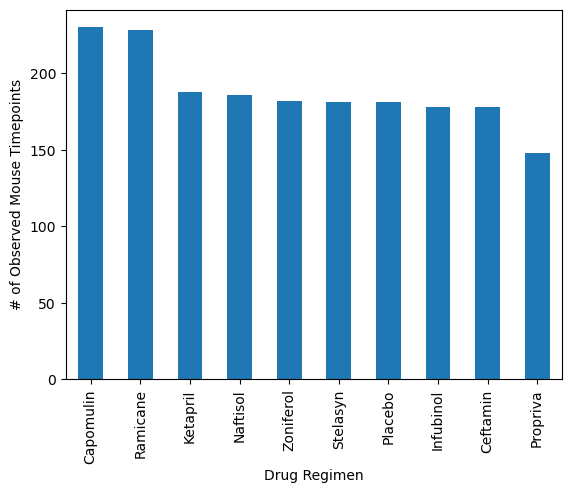

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Eli says use value_counts or a groupby and count
counts = mouse_data_clean['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

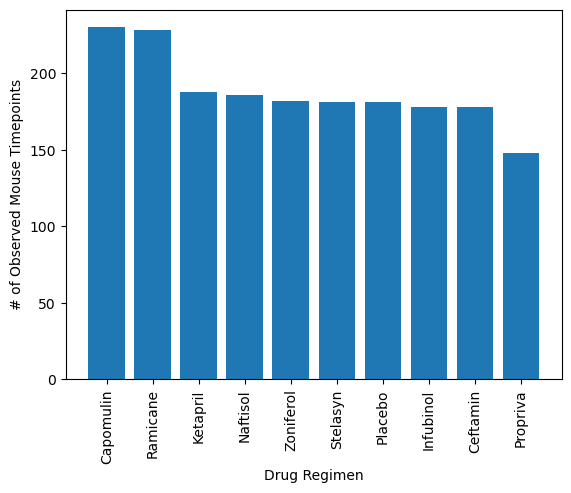

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index, counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.show()

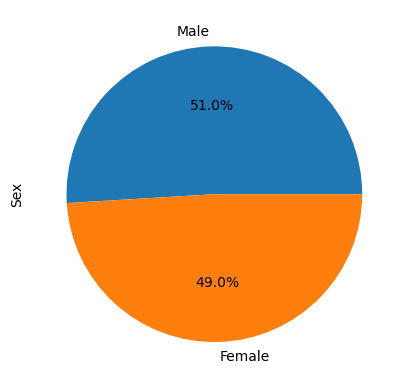

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = mouse_data_clean['Sex'].value_counts()
sex_counts.plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

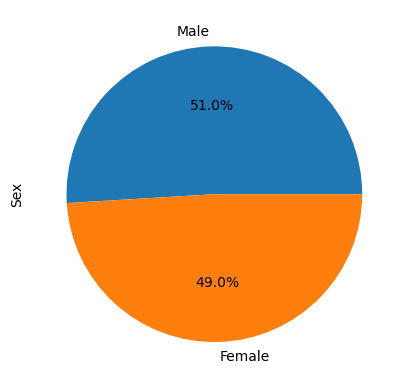

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Eli says use groupby and max by timepoint
timepoint_maxes = mouse_data_clean.groupby(by="Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tp_df = pd.merge(mouse_data_clean, timepoint_maxes, on=["Mouse ID", "Timepoint"])
last_tp_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [237]:
# Put treatments into a list for for loop (and later for plot labels)
# Eli says use this list
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# Eli says do something like volumes = []
volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Eli says the loop should look like
for t in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows = last_tp_df.loc[last_tp_df["Drug Regimen"] == t, "Tumor Volume (mm3)"]
    volumes.append(rows)

# Determine outliers using upper and lower bounds
outliers = {}
for i in range(4):
    quartiles = (volumes[i]).quantile([0.25, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers[i] = [value for value in volumes[i] if value < lower_bound or value > upper_bound]

print(f"Capomulin's potential outliers: {outliers[0]}")
print(f"Ramicane's potential outliers: {outliers[1]}")
print(f"Infubinol's potential outliers: {outliers[2]}")
print(f"Ceftamin's potential outliers: {outliers[3]}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


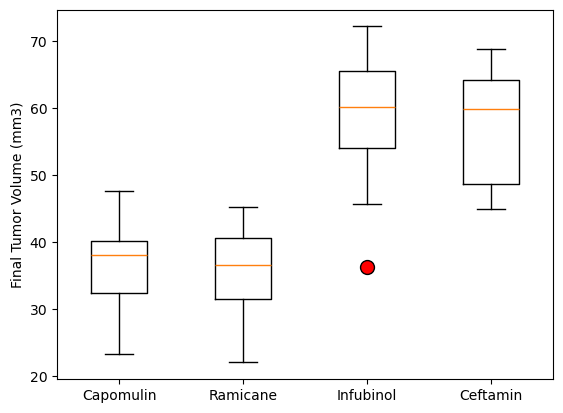

In [238]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Eli says use the list generated with the for loop
plt.boxplot(volumes, flierprops=dict(markerfacecolor='r', markersize=10))
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

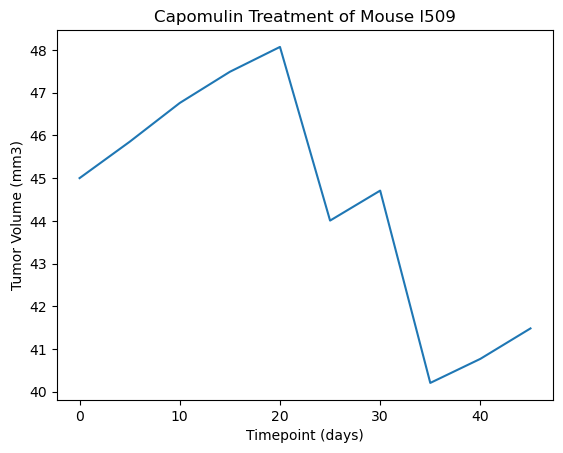

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# capturing the data for the mouse with the id l509 treated with capomulin
capomulin_l509 = mouse_data_clean[(mouse_data_clean['Drug Regimen'] == 'Capomulin') & (mouse_data_clean['Mouse ID'] == "l509")]

# creating line plot
plt.plot(capomulin_l509['Timepoint'], capomulin_l509['Tumor Volume (mm3)'], linestyle='-')
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

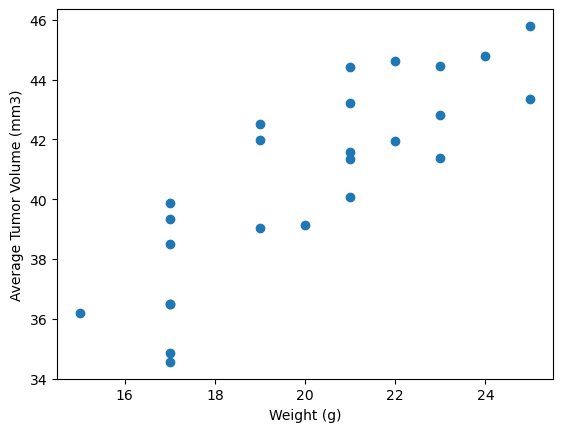

In [112]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# create dataframe for capomulin data
capomulin = mouse_data_clean[mouse_data_clean['Drug Regimen'] == 'Capomulin']

# find the average tumor volume for each mouse 
avg_tumor_vol = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# merging the capomulin data and the average tumor volumes for each mouse
merge_weight_tum = pd.merge(avg_tumor_vol, capomulin[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# creating the scatter plot
plt.scatter(merge_weight_tum['Weight (g)'], merge_weight_tum['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


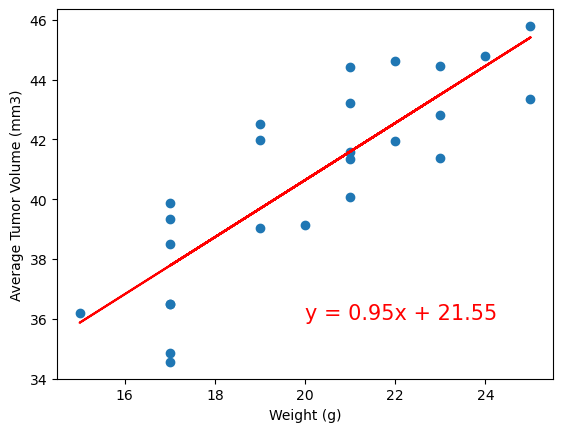

In [106]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# capturing the x and y values
x_values = merge_weight_tum['Weight (g)']
y_values = merge_weight_tum['Tumor Volume (mm3)']

# storing the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# finding the correlation
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")

# making the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()